In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
dataset['price'] = df.target

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
## Independed and dependent features

X = dataset.iloc[:,:-1]  ## independent features
y = dataset.iloc[:,-1]   ## dependent features

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()

In [19]:
regressor

LinearRegression()

In [20]:
from sklearn.model_selectionion import cross_val_score

In [21]:
mse = cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)

In [22]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [25]:
np.mean(mse)

-37.13180746769922

## Ridge 

In [26]:
from sklearn.linear_model import Ridge

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
ridge = Ridge()

In [29]:
ridge

Ridge()

In [32]:
parameters = {'alpha':[1e-15,1e-3,1e-2,10,20,30,40,50]}

In [33]:
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [34]:
print(ridge_regressor.best_params_)

{'alpha': 50}


In [35]:
print(ridge_regressor.best_score_)

-30.7700007965976


## Lasso 

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\aniyant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniyant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniyant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniyant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converg

{'alpha': 1}
-35.531580220694856


In [ ]:
## Elastic Net ##Homework

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [39]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)


In [40]:
import seaborn as sns

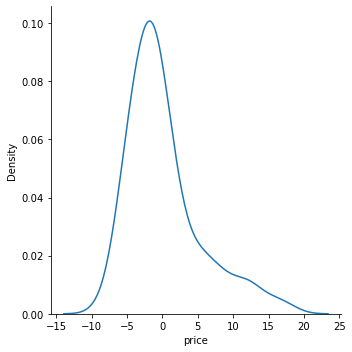

In [41]:
sns.displot(y_test-prediction_lasso,kind='kde')

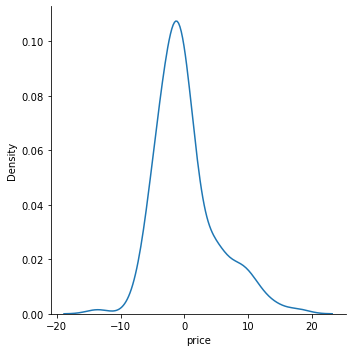

In [42]:
sns.displot(y_test-prediction_ridge,kind='kde')

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,prediction_lasso)

0.7007565336014613

In [45]:
r2_score(y_test,prediction_ridge)

0.7449674402549604